In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./kaggle_data/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle_data/titanic\gender_submission.csv
./kaggle_data/titanic\test.csv
./kaggle_data/titanic\titanic.zip
./kaggle_data/titanic\train.csv


In [2]:
data_path = "./kaggle_data/titanic/"

train_data = pd.read_csv(data_path+"train.csv", index_col='PassengerId')
test_data = pd.read_csv(data_path+"test.csv", index_col='PassengerId')

In [3]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_all = pd.concat([train_data, test_data], axis=0, sort=False)

In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [7]:
data_all.isnull().sum()/len(data_all)*100

Survived    31.932773
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

In [8]:
pd.unique(data_all.Sex)

array(['male', 'female'], dtype=object)

In [9]:
Sex_dict = {'female':0, 'male':1}
data_all.Sex = data_all.Sex.map(Sex_dict)

In [10]:
pd.unique(data_all.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
Embarked_dict = {'S':0,'C':1,'Q':2}
data_all.Embarked = data_all.Embarked.map(Embarked_dict)

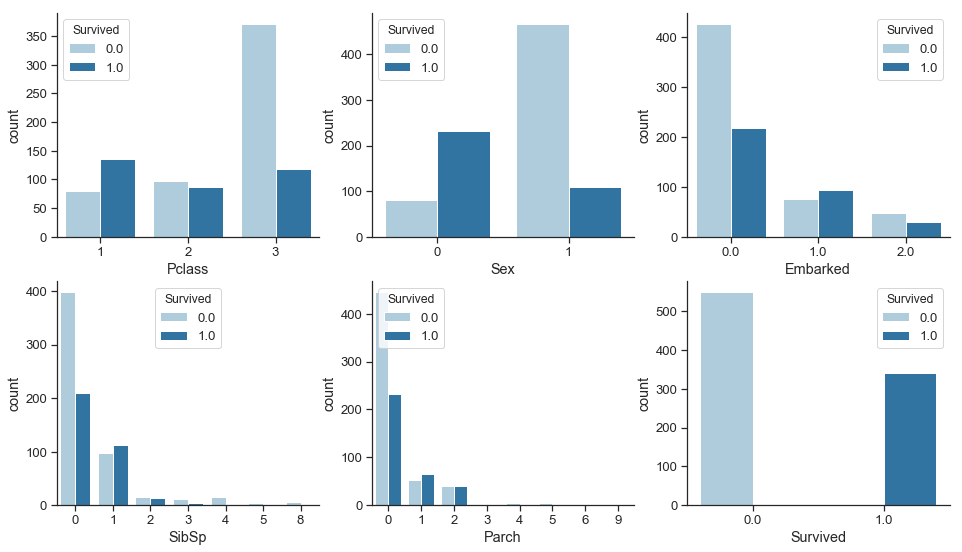

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data_all, x=feature, hue='Survived', palette='Paired')
    
sns.despine()

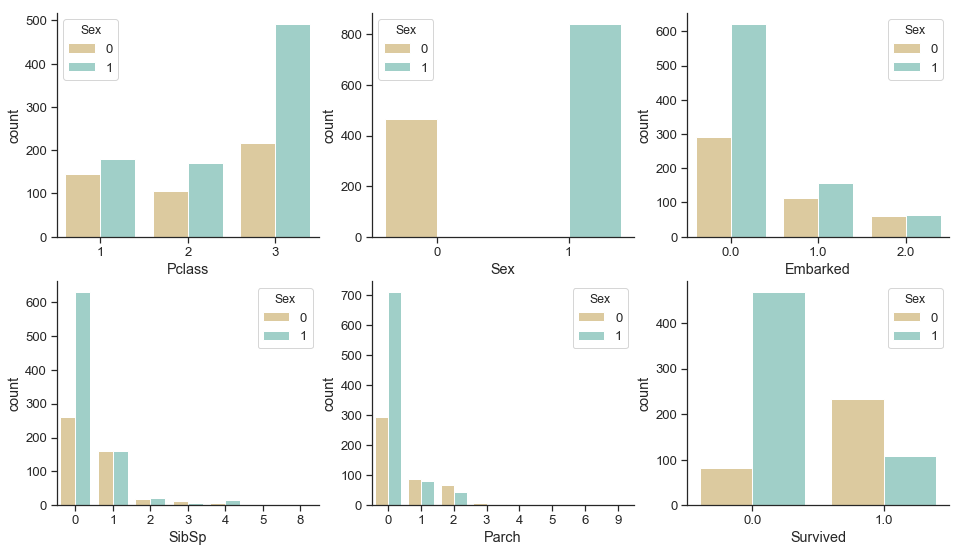

In [13]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data_all, x=feature, hue='Sex', palette='BrBG')
    
sns.despine()

In [14]:
data_all.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,0.124617,-0.408106,0.060832,0.018322,-0.558629,0.037527
Sex,-0.543351,0.124617,1.000000,0.063645,-0.109609,-0.213125,-0.185523,-0.121868
Age,-0.077221,-0.408106,0.063645,1.000000,-0.243699,-0.150917,0.178740,0.048993
SibSp,-0.035322,0.060832,-0.109609,-0.243699,1.000000,0.373587,0.160238,-0.073937
Parch,0.081629,0.018322,-0.213125,-0.150917,0.373587,1.000000,0.221539,-0.095975
Fare,0.257307,-0.558629,-0.185523,0.178740,0.160238,0.221539,1.000000,0.062017
Embarked,0.108669,0.037527,-0.121868,0.048993,-0.073937,-0.095975,0.062017,1.000000


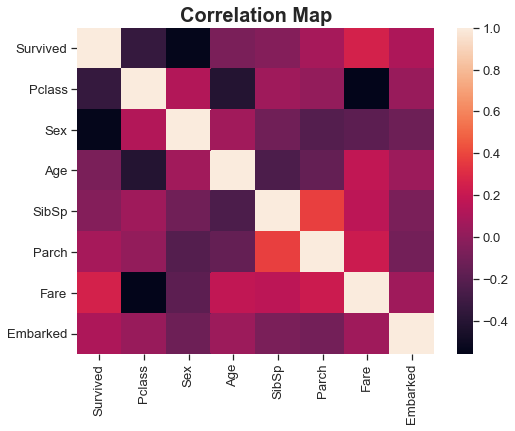

In [15]:
corr_all = data_all.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_all).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [16]:
freq_port = data_all['Embarked'].dropna().mode()[0]
data_all['Embarked'] = data_all['Embarked'].fillna(freq_port)

In [17]:
data_all.groupby(['Pclass','SibSp'])['Age'].mean()

Pclass  SibSp
1       0        39.033333
        1        39.943178
        2        39.125000
        3        23.500000
2       0        31.104398
        1        27.767317
        2        19.250000
        3        30.000000
3       0        27.055311
        1        23.576044
        2        19.031250
        3        12.454545
        4         8.772727
        5        10.166667
        8        14.500000
Name: Age, dtype: float64

In [18]:
data_all["Age"].fillna(data_all.groupby(['Pclass','SibSp'])['Age'].transform("mean"), inplace=True)

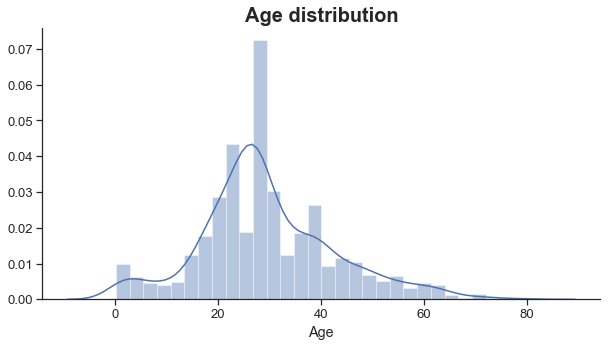

In [19]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.distplot(data_all['Age']).set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

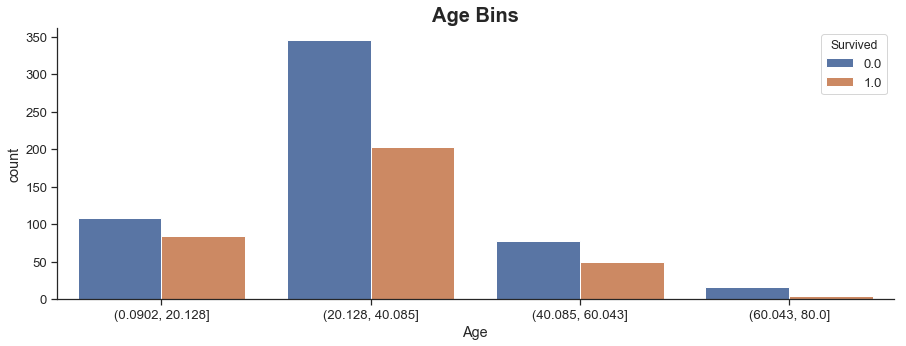

In [20]:
auxage = pd.cut(data_all['Age'], 4)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxage, hue='Survived', data=data_all).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data_all['Age'] = LabelEncoder().fit_transform(auxage) 

In [22]:
pd.crosstab(data_all['Age'], data_all['Survived'])

Survived,0.0,1.0
Age,,
0,109,84
1,345,203
2,78,50
3,17,5


In [23]:
data_all["Fare"].fillna(data_all.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

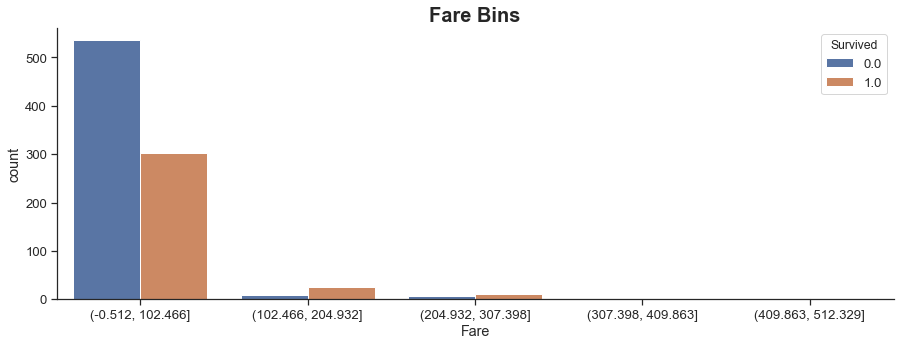

In [24]:
auxfare = pd.cut(data_all['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=data_all).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [25]:
data_all['Fare'] = LabelEncoder().fit_transform(auxfare) 

In [26]:
pd.crosstab(data_all['Fare'], data_all['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [27]:
data_all.drop(['Cabin'], axis = 1, inplace = True)

In [28]:
data_all['Title'] = data_all.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [29]:
data_all.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Dona          1
Sir           1
Mme           1
Countess      1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [30]:
least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

data_all.Title = data_all.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
data_all.Title = data_all.Title.replace(['Countess','Dona'], 'Mrs')
data_all.Title = data_all.Title.replace(['Don','Sir'], 'Mr')

data_all.Title = data_all.Title.replace(least_occuring,'Rare')

data_all.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [31]:
pd.crosstab(data_all['Title'], data_all['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,132
Mr,437,82
Mrs,26,100
Rare,14,5


In [32]:
data_all['Title'] = LabelEncoder().fit_transform(data_all['Title']) 

In [33]:
data_all['FamilySize'] = data_all['SibSp'] + data_all['Parch']+1
data_all.drop(['SibSp','Parch'], axis = 1, inplace = True)

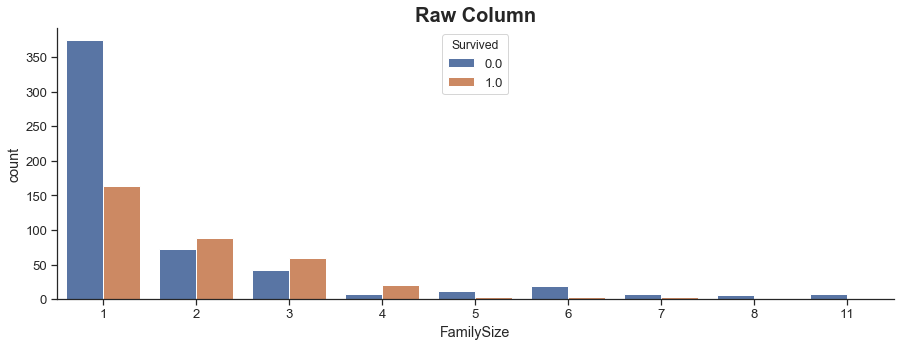

In [34]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=data_all).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [35]:
def family(x):
    if x < 2:
        return 0
    elif x <= 4:
        return 1
    elif x <= 6:
        return 2
    else:
        return 3
    
data_all['FamilySize'] = data_all['FamilySize'].apply(family)

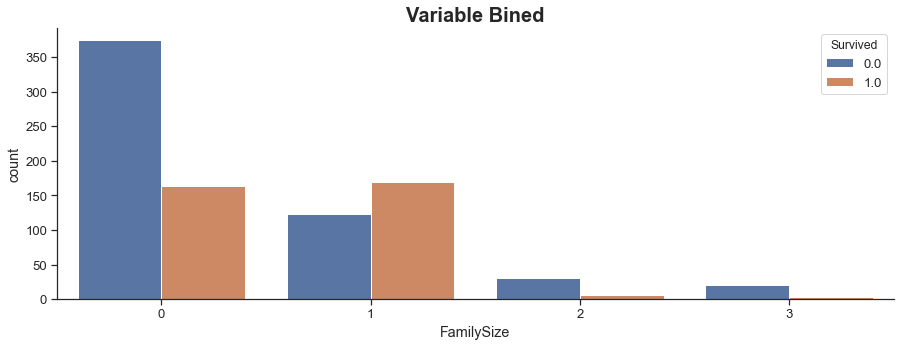

In [36]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=data_all).set_title("Variable Bined",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [37]:
data_all.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [38]:
train, test = data_all.loc[train_data.index], data_all.loc[test_data.index]

In [39]:
mask  = np.random.rand(len(train)) < 0.9
train_X = train.drop(['Survived'], axis=1)[mask]
train_y = train['Survived'][mask]
valid_X = train.drop(['Survived'], axis=1)[~mask]
valid_y = train['Survived'][~mask]

In [40]:
import torch

train_X = torch.Tensor(train_X.to_numpy())
train_y = torch.Tensor(train_y.to_numpy()).type(torch.LongTensor)
valid_X = torch.Tensor(valid_X.to_numpy())
valid_y = torch.Tensor(valid_y.to_numpy()).type(torch.LongTensor)

In [41]:
from torch import nn

drpout = 0.1

inputs = len(train_X[0])

def set_weight_bias(layer):
    layer.bias.data.fill_(0)
    layer.weight.data.normal_(std=0.01)

def model_construct(inputs, n=[16], outputs=2,
                    activ=nn.ReLU):
    n.append(outputs)
    
    layers = []
    layers.append(nn.Linear(inputs, n[0]))
    set_weight_bias(layers[-1])
    layers.append( nn.Dropout(p=drpout) )
    layers.append(activ())
    
    for i in range(len(n)-1):
        layers.append(nn.Linear(n[i], n[i+1]))
        set_weight_bias(layers[-1])
        layers.append( nn.Dropout(p=drpout) )
        layers.append(activ())
        
    layers.pop()
    layers.pop()
    
    return nn.Sequential(*layers)



In [42]:
from torch import optim
from sklearn.utils import shuffle
from torch.autograd import Variable

def train_model(model, train_data, test_data, epochs=5, verbose=False):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_losses, test_losses = [0]*epochs, [0]*epochs
    accuracy = [0]*epochs
    for e in range(epochs):
        optimizer.zero_grad()
        ps = model(train_data[0])
        loss = criterion(ps, train_data[1])
        loss.backward()
        optimizer.step()
        train_losses[e] = loss.item()

        with torch.no_grad():
            model.eval()
            
            ps = model(test_data[0])
            loss = criterion(ps, test_data[1])
            test_losses[e] = loss.item()
            
            top_p, top_class = ps.topk(1, dim=1)
            equals = (top_class == test_data[1].view(*top_class.shape))
            accuracy[e] = torch.mean(equals.type(torch.FloatTensor))
            
        model.train()
        
    print('   Accuracy: {:.2f}%'.format(100*accuracy[-1].item()))
    print('   Train loss: {train_losses[-1]}')
    print('   Test loss: {test_losses[-1]}')
        
    plt.subplot(211)
    plt.ylabel('Accuracy')
    plt.plot(accuracy)
    plt.subplot(212)
    plt.ylabel('Loss')
    plt.plot(train_losses, label='train')
    plt.plot(test_losses, label='test')
    plt.legend();
    return

Test 1:
Sequential(
  (0): Linear(in_features=7, out_features=256, bias=True)
  (1): Dropout(p=0.1, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=2, bias=True)
)
   Accuracy: 80.95%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}


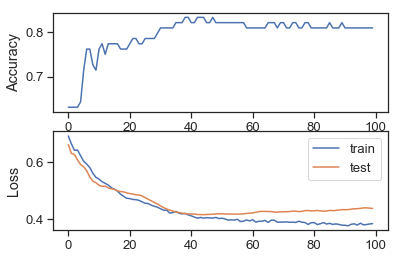

In [43]:
print("Test 1:")
model = model_construct(inputs, n=[256])
print(model)
train_model(model, epochs=100,
            train_data=(train_X,train_y), test_data=(valid_X,valid_y))

Test 2:
Sequential(
  (0): Linear(in_features=7, out_features=256, bias=True)
  (1): Dropout(p=0.1, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=48, bias=True)
  (4): Dropout(p=0.1, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=48, out_features=2, bias=True)
)
   Accuracy: 79.76%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}


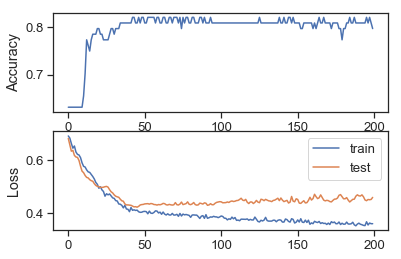

In [44]:
print("Test 2:")
model = model_construct(inputs, n=[256, 48])
print(model)
train_model(model, epochs=200,
            train_data=(train_X,train_y), test_data=(valid_X,valid_y))

Test 3:
Sequential(
  (0): Linear(in_features=7, out_features=96, bias=True)
  (1): Dropout(p=0.1, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=96, out_features=2, bias=True)
)
   Accuracy: 83.33%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}


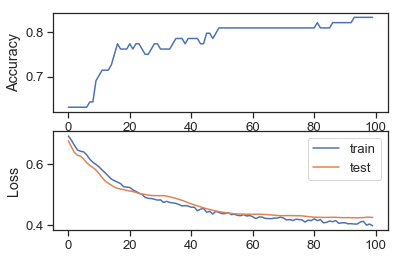

In [45]:
print("Test 3:")
model = model_construct(inputs, n=[96])
print(model)
train_model(model, epochs=100,
            train_data=(train_X,train_y), test_data=(valid_X,valid_y))

In [46]:
def gen_model():
    model = model_construct(inputs, n=[96])
    train_model(model, epochs=100,
                train_data=(train_X,train_y), test_data=(valid_X,valid_y))
    
    return model

In [47]:
def combined_pred(models, data):
    prob = np.array([[0.0]*2]*len(data))
    with torch.no_grad():
        for model in models:
            model.eval()
            prob += torch.exp(model(data)).numpy()
            model.train()
    return prob/len(models)

   Accuracy: 82.14%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}
   Accuracy: 82.14%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}


d:\pyenv\ml3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


   Accuracy: 83.33%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}
   Accuracy: 83.33%
   Train loss: {train_losses[-1]}
   Test loss: {test_losses[-1]}
83.33333333333334


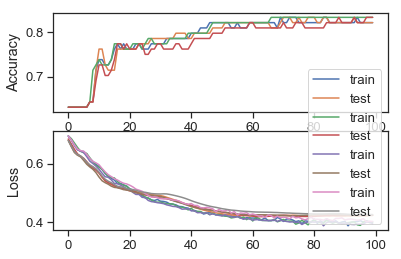

In [48]:
models = []
for i in range(4):
    models.append(gen_model())
preds = combined_pred(models, valid_X)
top_class = np.argmax(preds, axis=1)
equals = (top_class == valid_y.numpy())
print(100*np.mean(equals))

In [53]:
test_X = test.drop(['Survived'], axis=1)
test_X = torch.Tensor(test_X.to_numpy())

results = combined_pred(models, test_X)
top_class = np.argmax(results, axis=1)
print(top_class)

submission_df = pd.DataFrame({'PassengerId': test_data.index, 
                              'Survived': top_class})
submission_df.describe()

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.382775
std,120.810458,0.486647
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [52]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [54]:
submission_df.to_csv('submission.csv', index=False)